# Plotting and Visualization

## 1. A Brief matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### 1.1 Figures and Subplots

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

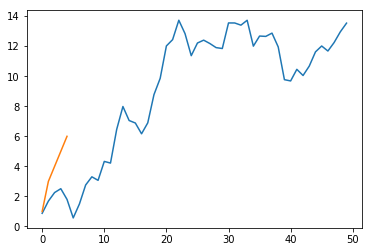

In [12]:
from numpy.random import randn
plt.plot(randn(50).cumsum())
plt.plot([1,3,4,5,6])


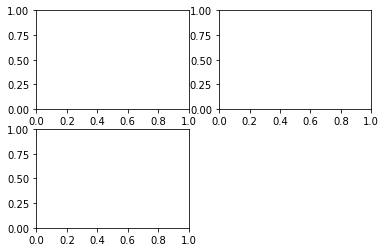

In [14]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

#plt.plot(randn(50).cumsum(), 'k--')


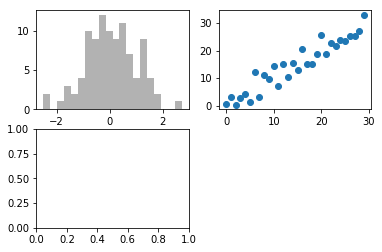

In [15]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

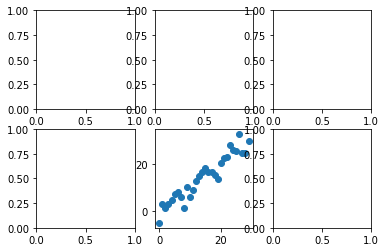

In [16]:
fig, axes = plt.subplots(2, 3)
axes[1][1].scatter(np.arange(30), np.arange(30) + 3*randn(30))

sharex: All subplots should use the same X-axis ticks (adjusting the xlim will affect all subplots)

sharey: All subplots should use the same Y-axis ticks (adjusting the ylim will affect all subplots)


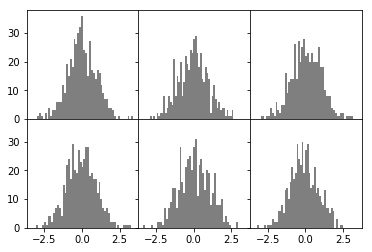

In [17]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 1.2 Color, Markers, and Line Styles

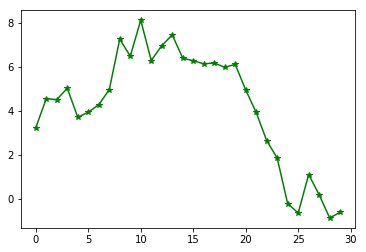

In [18]:
plt.plot(randn(30).cumsum(), 'g*-')

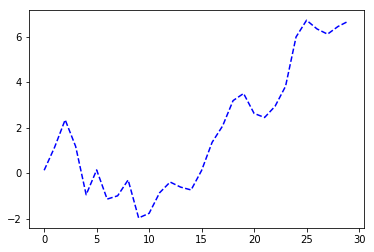

In [19]:
plt.plot(randn(30).cumsum(), linestyle='--', color='blue')

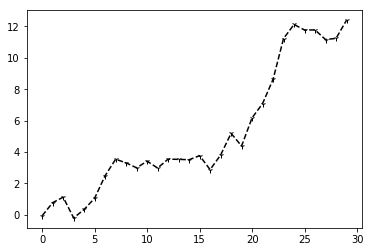

In [20]:
data = randn(30).cumsum()
#plt.plot(data, 'ko--', label='steps-post')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='1')

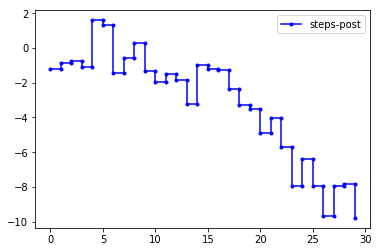

In [21]:
plt.plot(data, 'b.-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

https://matplotlib.org/users/pyplot_tutorial.html

### 1.3 Ticks, Labels, and Legends

In [22]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

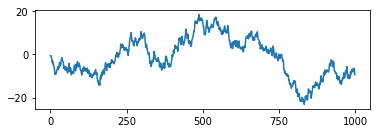

In [43]:
ax = plt.subplot(2, 1, 1)
plt.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=0, fontsize='large')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 1.4 Annotations and Drawing on a Subplot

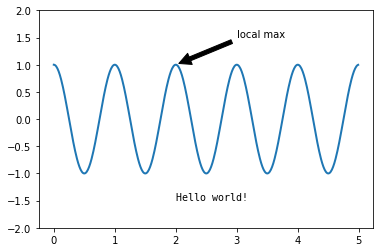

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05),)
ax.text(2, -1.5, 'Hello world!', family='monospace', fontsize=10)
ax.set_ylim(-2,2)
plt.show()




https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate

## 2. Plotting Functions in pandas

### 2.1 Line Plots

In [31]:
import numpy as np
from pandas import Series
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.285207
10   -0.162365
20   -0.084192
30    1.090125
40   -0.159280
50    0.629843
60    0.048097
70   -1.487364
80   -0.850285
90   -0.878186
dtype: float64

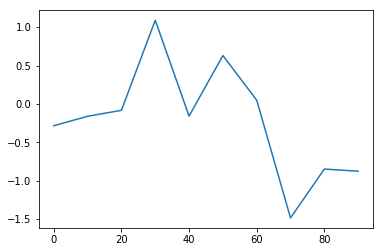

In [32]:
s.plot()
#plt.legend(loc='best')

label: Label for plot legend

ax: matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot

style: Style string, like 'ko--', to be passed to matplotlib.

alpha: The plot fill opacity (from 0 to 1)

kind: Can be 'line', 'bar', 'barh', 'kde'

logy: Use logarithmic scaling on the Y axis

use_index: Use the object index for tick labels

rot: Rotation of tick labels (0 through 360)

xticks: Values to use for X axis ticks

yticks: Values to use for Y axis ticks

xlim: X axis limits (e.g. [0, 10])

ylim: Y axis limits

grid: Display axis grid (on by default)

In [33]:
from pandas import DataFrame
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.273763,0.016342,-0.574528,-0.468163
10,-0.549573,-0.127190,0.968665,-1.267106
20,-0.949765,-0.344718,2.451325,-1.784378
30,0.623569,1.266815,3.017377,-0.632436
40,0.649124,1.207608,2.933414,-2.109578
50,1.837273,0.794444,3.794632,-2.857856
60,2.098198,1.756813,4.223698,-1.474954
70,2.003840,1.692721,3.975635,-2.138302
80,1.423869,0.583562,3.386869,-3.542592
90,3.058775,0.641263,5.018891,-3.892059


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aa9b9e8>,
      dtype=object)

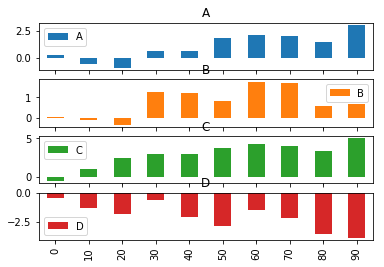

In [34]:
df.plot(subplots = (4,1), kind = 'bar')

subplots: Plot each DataFrame column in a separate subplot
    
sharex: If subplots=True, share the same X axis, linking ticks and limits
    
sharey: If subplots=True, share the same Y axis
    
figsize: Size of figure to create as tuple
    
title: Plot title as string
    
legend: Add a subplot legend (True by default)
    
sort_columns: Plot columns in alphabetical order; by default uses existing column order


### 2.2 Bar Plot

a    0.904140
b    0.533766
c    0.425200
d    0.438062
e    0.458332
f    0.868049
g    0.432211
h    0.764406
i    0.531858
j    0.726666
k    0.528137
l    0.853003
m    0.318989
n    0.873348
o    0.115657
p    0.303913
dtype: float64


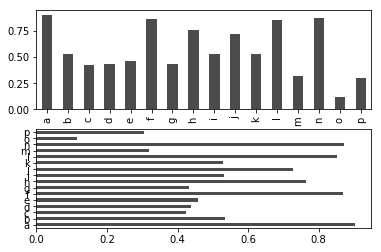

In [35]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
print(data)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

### 2.3 Histograms and Density Plots

In [36]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 3, size=200)
values = Series(np.concatenate([comp1, comp2]))
values

0       1.047278
1       0.941930
2      -0.121815
3       0.045446
4      -0.569552
5       0.574999
6      -0.469737
7      -2.207171
8       2.207288
9      -0.065815
10      1.338436
11      0.151478
12     -0.470819
13     -0.509984
14      0.043615
15     -0.620331
16     -2.196744
17     -0.009992
18      0.730647
19     -0.937914
20      0.722138
21     -0.783926
22      1.951880
23      0.713229
24      1.313267
25      0.180651
26     -0.182971
27      0.165455
28     -0.782435
29     -1.574095
         ...    
370    10.109212
371     8.410502
372     7.960108
373    11.161372
374    10.878661
375    11.116269
376     6.764061
377     9.657538
378    12.954924
379    10.374131
380     8.995937
381    10.437634
382     6.535313
383    13.505540
384    10.220429
385     5.892548
386    15.577521
387    13.835495
388     7.531794
389    10.276768
390     6.443435
391     5.266342
392     3.427260
393     8.488137
394    -1.775257
395     6.861137
396    14.656324
397     3.6371

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


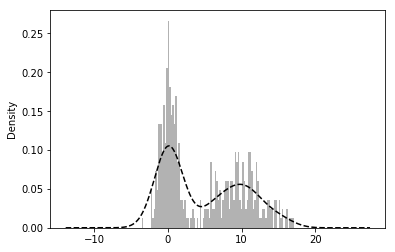

In [40]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 2.4 Scatter Plots

In [38]:
import pandas as pd
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

FileNotFoundError: File b'macrodata.csv' does not exist

In [ ]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [39]:
pd.scatter_matrix(trans_data, diagonal='kde', alpha=0.3)

NameError: name 'trans_data' is not defined

## 3. Practice

1. plot two random walks in single figure.
2. adding a legend for two lines.
3. add a "HELLO" in the figure
4. set two different color and different line style for two lines.

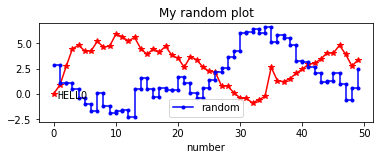

In [73]:
from numpy.random import randn
ax = plt.subplot(2, 1, 1)

plt.plot(randn(50).cumsum(),'g*-', color='red')
ax.set_title('My random plot')
ax.set_xlabel('number')

ax.text(0.5, -0.5, 'HELLO', family='monospace', fontsize=10)

plt.plot(randn(50).cumsum(), 'b.-', drawstyle='steps-post', label='random')
plt.legend(loc='best')

In [50]:
plt.plot(data, 'b.-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Text(2,-1.5,'Hello world!')